In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.DataFrame({
    'x1': np.random.normal(0,2,10000),
    'x2': np.random.normal(5,3,10000),
    'x3': np.random.normal(-5,5,10000)
})

In [4]:
df

x1        x2         x3
0     0.950374  8.500896  -6.503230
1     2.735863  7.190715  -5.330139
2    -0.205914 -3.335769  -7.680904
3    -0.780919  0.121188   0.040396
4     1.397539  8.837413 -10.502503
...        ...       ...        ...
9995  0.807679  4.994513  -4.349987
9996  1.175571  0.930574  -4.851923
9997  2.784311  7.094970  -9.416226
9998 -0.124541  6.644418   1.885483
9999  0.923768  7.730382   1.432739

[10000 rows x 3 columns]

<AxesSubplot:ylabel='Density'>

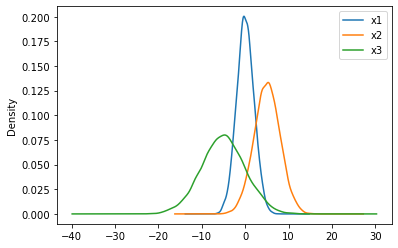

In [5]:
df.plot.kde()

# Standard scaler

In [22]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

In [7]:
std = StandardScaler()

In [8]:
data_std = std.fit_transform(df)

In [11]:
df_std = pd.DataFrame(data_std, columns=['x1', 'x2', 'x3'])

In [12]:
df_std

x1        x2        x3
0     0.470590  1.168867 -0.285478
1     1.366887  0.727416 -0.052168
2    -0.109855 -2.819365 -0.519700
3    -0.398501 -1.654582  1.015950
4     0.695062  1.282253 -1.080873
...        ...       ...       ...
9995  0.398959 -0.012570  0.142769
9996  0.583636 -1.381869  0.042942
9997  1.391207  0.695156 -0.864829
9998 -0.069006  0.543347  1.382910
9999  0.457234  0.909251  1.292866

[10000 rows x 3 columns]

<AxesSubplot:ylabel='Density'>

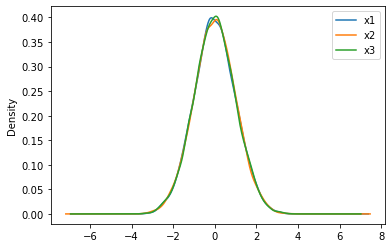

In [13]:
df_std.plot.kde()

In [16]:
df = pd.DataFrame({
    'x1':np.random.chisquare(8,1000),
    'x2':np.random.beta(8,2,1000)*40,
    'x3':np.random.normal(50,3,1000)
})

<AxesSubplot:ylabel='Density'>

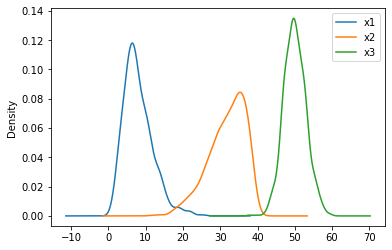

In [24]:
df.plot.kde()

In [34]:
std = StandardScaler()

In [35]:
data_std = std.fit_transform(df)

In [36]:
df_std = pd.DataFrame(data_std, columns=['x1', 'x2', 'x3'])

<AxesSubplot:ylabel='Density'>

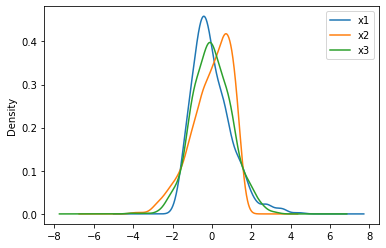

In [37]:
df_std.plot.kde()

In [30]:
minmax = MinMaxScaler()

In [31]:
data_minmax = minmax.fit_transform(df)

In [32]:
df_minmax = pd.DataFrame(data_minmax, columns=['x1', 'x2', 'x3'])

<AxesSubplot:ylabel='Density'>

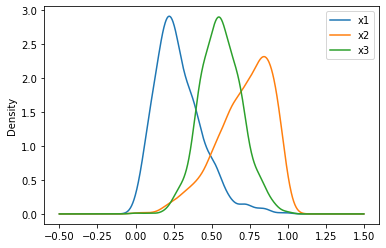

In [33]:
df_minmax.plot.kde()

In [39]:
df_minmax.values.min(), df_minmax.values.max()

(0.0, 1.0000000000000002)

In [40]:
df_std.values.min(), df_std.values.max()

(-4.0973122097334915, 4.541087631003068)

In [41]:
df = pd.DataFrame({
    'x1': np.concatenate([np.random.normal(20,1,1000), np.random.normal(1,1,25)]),
    'x2': np.concatenate([np.random.normal(30,1,1000), np.random.normal(50,1,25)])
})

<AxesSubplot:ylabel='Density'>

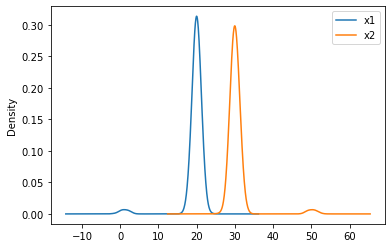

In [42]:
df.plot.kde()

In [43]:
std = StandardScaler()

In [44]:
data_std = std.fit_transform(df)

In [46]:
df_std = pd.DataFrame(data_std, columns=['x1', 'x2'])

<AxesSubplot:ylabel='Density'>

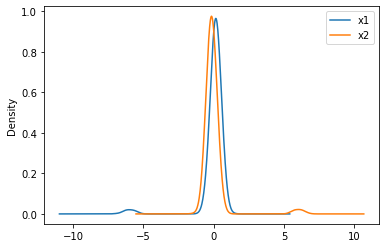

In [47]:
df_std.plot.kde()

In [48]:
minmax = MinMaxScaler()

In [49]:
data_minmax = minmax.fit_transform(df)

In [51]:
df_minmax = pd.DataFrame(data_minmax, columns=['x1', 'x2'])

<AxesSubplot:ylabel='Density'>

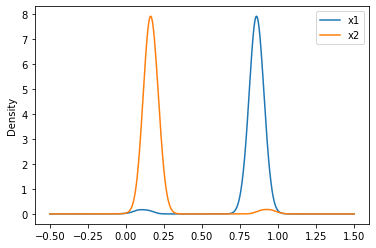

In [52]:
df_minmax.plot.kde()

In [54]:
robust = RobustScaler()

In [55]:
data_rob = robust.fit_transform(df)

In [56]:
df_rob = pd.DataFrame(data_rob, columns=['x1', 'x2'])

<AxesSubplot:ylabel='Density'>

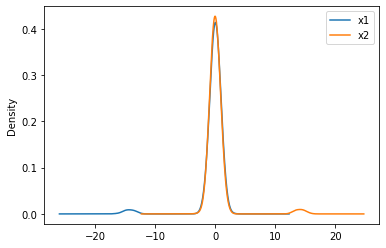

In [57]:
df_rob.plot.kde()

<AxesSubplot:ylabel='Density'>

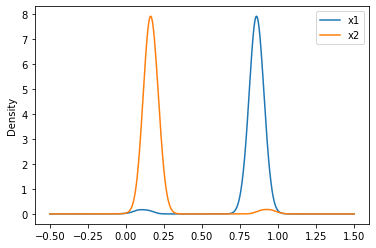

In [58]:
df_minmax.plot.kde()

<AxesSubplot:ylabel='Density'>

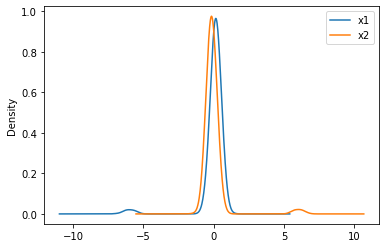

In [59]:
df_std.plot.kde()

## Log Scaling

In [65]:
df = pd.DataFrame({
    'Income':[1800, 350000, 20000, 10000, 7000, 10000, 600000]
})

In [66]:
df

Income
0    1800
1  350000
2   20000
3   10000
4    7000
5   10000
6  600000

<AxesSubplot:>

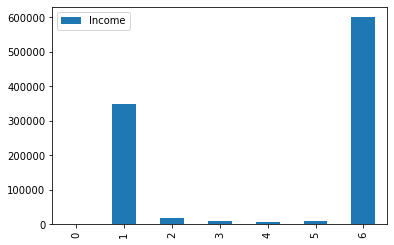

In [69]:
df.plot.bar()

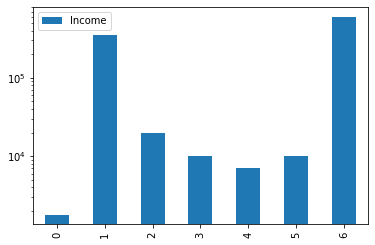

In [68]:
df.plot.bar()
plt.yscale('log')

array([[<AxesSubplot:title={'center':'Income'}>]], dtype=object)

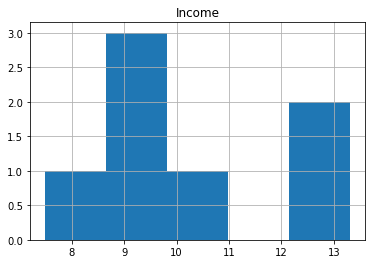

In [73]:
np.log(df).hist(bins=5)

array([[<AxesSubplot:title={'center':'Income'}>]], dtype=object)

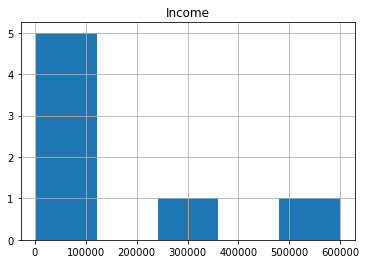

In [72]:
df.hist(bins=5)

# Transformers

In [91]:
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

In [76]:
data = pd.read_csv('train.csv')

In [77]:
data

PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ...    ...   
886                              Montvila, Rev. Juozas    male  27.0      0   
887                       Graham, Miss. Margaret Edith  female  19.0      0   
888           Johnston, Miss. Catherine Helen "Carrie"  female   NaN      1   
889                              Behr, Mr. Karl Howell    male  26.0      0   
890                                Dooley, Mr. Patrick    male  32.0      0   

     Parch            Ticket     Fare Cabin Embarked  
0        0         A/5 21171   7.2500   NaN        S  
1        0          PC 17599  71.2833   C85        C  
2        0  STON/O2. 3101282   7.9250   NaN        S  
3        0            113803  53.1000  C123        S  
4        0            373450   8.0500   NaN        S  
..     ...               ...      ...   ...      ...  
886      0            211536  13.0000   NaN        S  
887      0            112053  30.0000   B42        S  
888      2        W./C. 6607  23.4500   NaN        S  
889      0            111369  30.0000  C148        C  
890      0            370376   7.7500   NaN        Q  

[891 rows x 12 columns]

In [79]:
data.drop('PassengerId', axis=1, inplace=True)

In [80]:
data

Survived  Pclass                                               Name  \
0           0       3                            Braund, Mr. Owen Harris   
1           1       1  Cumings, Mrs. John Bradley (Florence Briggs Th...   
2           1       3                             Heikkinen, Miss. Laina   
3           1       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)   
4           0       3                           Allen, Mr. William Henry   
..        ...     ...                                                ...   
886         0       2                              Montvila, Rev. Juozas   
887         1       1                       Graham, Miss. Margaret Edith   
888         0       3           Johnston, Miss. Catherine Helen "Carrie"   
889         1       1                              Behr, Mr. Karl Howell   
890         0       3                                Dooley, Mr. Patrick   

        Sex   Age  SibSp  Parch            Ticket     Fare Cabin Embarked  
0      male  22.0      1      0         A/5 21171   7.2500   NaN        S  
1    female  38.0      1      0          PC 17599  71.2833   C85        C  
2    female  26.0      0      0  STON/O2. 3101282   7.9250   NaN        S  
3    female  35.0      1      0            113803  53.1000  C123        S  
4      male  35.0      0      0            373450   8.0500   NaN        S  
..      ...   ...    ...    ...               ...      ...   ...      ...  
886    male  27.0      0      0            211536  13.0000   NaN        S  
887  female  19.0      0      0            112053  30.0000   B42        S  
888  female   NaN      1      2        W./C. 6607  23.4500   NaN        S  
889    male  26.0      0      0            111369  30.0000  C148        C  
890    male  32.0      0      0            370376   7.7500   NaN        Q  

[891 rows x 11 columns]

### Train test split

In [81]:
X = data.drop('Survived', axis=1)

In [82]:
from sklearn.model_selection import train_test_split

In [83]:
train, test = train_test_split(X, test_size=0.4)

In [84]:
train.shape, test.shape

((534, 10), (357, 10))

In [86]:
numerical_columns = ['Age', 'Fare']
categorical_columns = ['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']

In [85]:
train

Pclass                                             Name     Sex   Age  \
230       1     Harris, Mrs. Henry Birkhardt (Irene Wallach)  female  35.0   
507       1    Bradley, Mr. George ("George Arthur Brayton")    male   NaN   
0         3                          Braund, Mr. Owen Harris    male  22.0   
617       3  Lobb, Mrs. William Arthur (Cordelia K Stanlick)  female  26.0   
244       3                             Attalah, Mr. Sleiman    male  30.0   
..      ...                                              ...     ...   ...   
691       3                               Karun, Miss. Manca  female   4.0   
203       3                             Youseff, Mr. Gerious    male  45.5   
123       2                              Webber, Miss. Susan  female  32.5   
48        3                              Samaan, Mr. Youssef    male   NaN   
93        3                          Dean, Mr. Bertram Frank    male  26.0   

     SibSp  Parch     Ticket     Fare Cabin Embarked  
230      1      0      36973  83.4750   C83        S  
507      0      0     111427  26.5500   NaN        S  
0        1      0  A/5 21171   7.2500   NaN        S  
617      1      0  A/5. 3336  16.1000   NaN        S  
244      0      0       2694   7.2250   NaN        C  
..     ...    ...        ...      ...   ...      ...  
691      0      1     349256  13.4167   NaN        C  
203      0      0       2628   7.2250   NaN        C  
123      0      0      27267  13.0000  E101        S  
48       2      0       2662  21.6792   NaN        C  
93       1      2  C.A. 2315  20.5750   NaN        S  

[534 rows x 10 columns]

In [87]:
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

In [88]:
numeric_transformer

Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                ('scaler', StandardScaler())])

In [89]:
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

In [90]:
categorical_transformer

Pipeline(steps=[('imputer',
                 SimpleImputer(fill_value='missing', strategy='constant')),
                ('onehot', OneHotEncoder(handle_unknown='ignore'))])

In [107]:
train['Cabin'].unique()

array(['C83', nan, 'E50', 'E67', 'E33', 'B79', 'D33', 'A20', 'D56', 'B86',
       'F4', 'F G63', 'A6', 'C110', 'B77', 'C101', 'A14', 'B69', 'B37',
       'C22 C26', 'C23 C25 C27', 'B58 B60', 'C78', 'C82', 'C95', 'A10',
       'F2', 'A36', 'E8', 'C123', 'D20', 'C30', 'E101', 'D21', 'D47',
       'E38', 'B51 B53 B55', 'C70', 'F33', 'E44', 'F G73', 'D46', 'B3',
       'D19', 'B96 B98', 'D36', 'E77', 'C62 C64', 'C111', 'B94', 'D15',
       'D35', 'C87', 'B49', 'E25', 'C50', 'C92', 'C46', 'D', 'D17', 'D50',
       'B78', 'B28', 'D48', 'A7', 'C65', 'A23', 'C148', 'D28', 'C7',
       'B73', 'E36', 'C86', 'C99', 'C68', 'G6', 'E31', 'C124', 'B22',
       'C104', 'E121', 'C126', 'C49', 'D30', 'C118', 'B4', 'B18', 'E63',
       'B57 B59 B63 B66', 'B101', 'D49', 'E46', 'E68', 'F38', 'C93',
       'D26', 'E12', 'E40', 'F E69', 'C128', 'B20'], dtype=object)

In [108]:
pd.get_dummies(train['Sex'])

female  male
230       1     0
507       0     1
0         0     1
617       1     0
244       0     1
..      ...   ...
691       1     0
203       0     1
123       1     0
48        0     1
93        0     1

[534 rows x 2 columns]

In [109]:
class CabinFeatureTransformer(BaseEstimator, TransformerMixin):
    
    def __init__(self):
        print('Custom Transformer')
        
    def fit(self, x, y=None):
        
        x['Cabin'].fillna('U', inplace=True)
        x['Cabin'] = x['Cabin'].map(lambda x: x[0])
        
        cabin_dummies = pd.get_dummies(x['Cabin'])
        self.cabin_col = cabin_dummies.columns
        
        return self
    
    def transform(self, x):
        x['Cabin'].fillna('U', inplace=True)
        x['Cabin'] = x['Cabin'].map(lambda x: x[0])
        
        cabin_dummies = pd.get_dummies(x['Cabin'])
        cabin_dummies = cabin_dummies.reindex(columns=self.cabin_col, fill_value=0)
        
        x = pd.concat([x, cabin_dummies], axis=1)
        
        x.drop('Cabin', axis=1, inplace=True)
        
        return x

In [110]:
transformer = ColumnTransformer(
    transformers=[
        ('numeric', numeric_transformer, numerical_columns),
        ('category', categorical_transformer, categorical_columns),
        ('cabin', CabinFeatureTransformer(), ['Cabin'])
    ])

Custom Transformer


In [111]:
transformer

ColumnTransformer(transformers=[('numeric',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 ['Age', 'Fare']),
                                ('category',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(fill_value='missing',
                                                                strategy='constant')),
                                                 ('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['Pclass', 'Sex', 'SibSp', 'Parch',
                                  'Embarked']),
                                ('cabin', CabinFeatureTransformer(),
                                 ['Cabin'])])

In [113]:
transformer.fit_transform(train)

Custom Transformer


array([[ 0.38094367,  0.98866153,  1.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.08286268, -0.10829791,  1.        , ...,  0.        ,
         0.        ,  1.        ],
       [-0.62397009, -0.48021389,  0.        , ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 0.18769102, -0.36940991,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.08286268, -0.20215949,  0.        , ...,  0.        ,
         0.        ,  1.        ],
       [-0.31476586, -0.2234377 ,  0.        , ...,  0.        ,
         0.        ,  1.        ]])

In [114]:
transformer.transform(test)

array([[-0.93317432, -0.27305862,  0.        , ...,  0.        ,
         0.        ,  1.        ],
       [-0.39206692, -0.11889655,  0.        , ...,  0.        ,
         0.        ,  1.        ],
       [-0.08286268, -0.11889655,  1.        , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-1.78348597, -0.11407899,  0.        , ...,  0.        ,
         0.        ,  1.        ],
       [ 0.76744896,  1.97192645,  1.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.08286268, -0.46985613,  0.        , ...,  0.        ,
         0.        ,  1.        ]])

In [100]:
train.shape

(534, 10)